<IPython.core.display.Javascript object>


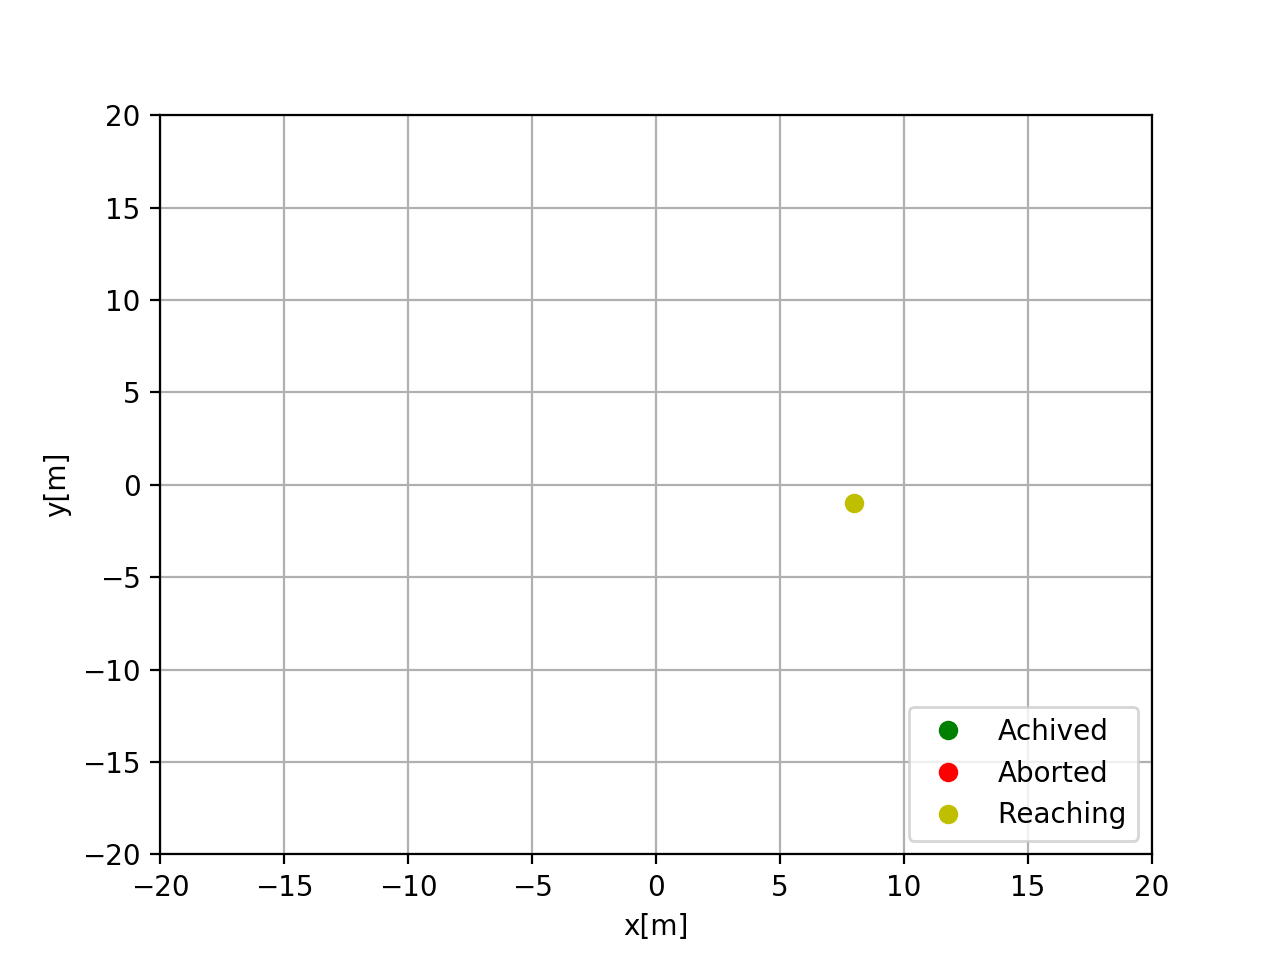

In [1]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from actionlib_msgs.msg import GoalStatusArray

rospy.init_node('target_node')

status = [0,0]

pos_x = 0
pos_y = 0

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln_g, = plt.plot([], [], 'go',label='Achived')
        self.ln_r, = plt.plot([], [], 'ro',label='Aborted')
        self.ln_x, = plt.plot([], [], 'yo',label='Reaching')
        
        plt.grid()
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.legend(handles=[self.ln_g, self.ln_r,self.ln_x], loc='lower right')
        
        self.x_data_g, self.y_data_g = [] , []
        self.x_data_r, self.y_data_r = [] , []
        self.x_data_x, self.y_data_x = [] , []
        
    def plot_init(self): 
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        
        return self.ln_g, self.ln_r, self.ln_x
    
    def status_cb(self, msg): 
        
        global status 
        global pos_x
        global pos_y
        
        try:
            status.append(msg.status_list[0].status)

            pos_x = rospy.get_param("des_pos_x")
            pos_y = rospy.get_param("des_pos_y")


            if status[-1] == 1 and status[-2] != 1:

                self.y_data_x.append(pos_y) 
                self.x_data_x.append(pos_x)

            elif (status[-1] == 2 and status[-2] != 2) or (status[-1] == 4 and status[-2] != 4):

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_r.append(pos_y) 
                self.x_data_r.append(pos_x)

            elif status[-1] == 3 and status[-2] != 3:

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_g.append(pos_y) 
                self.x_data_g.append(pos_x)
                
        except IndexError:
            pass
        
    
    def update_plot(self, frame):
        
        self.ln_g.set_data(self.x_data_g, self.y_data_g)
        self.ln_r.set_data(self.x_data_r, self.y_data_r)
        self.ln_x.set_data(self.x_data_x, self.y_data_x)

        return self.ln_g,self.ln_r,self.ln_xe
            
       
        

vis = Visualiser()
sub = rospy.Subscriber('/move_base/status', GoalStatusArray, vis.status_cb)

ani = FuncAnimation(vis.fig, vis.update_plot, init_func = vis.plot_init)


        
plt.show(block=True)

